In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,2


In [4]:
df.shape

(954, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        954 non-null    int64 
 1   Age               954 non-null    int64 
 2   Sex               954 non-null    object
 3   Job               954 non-null    int64 
 4   Housing           954 non-null    object
 5   Saving accounts   779 non-null    object
 6   Checking account  576 non-null    object
 7   Credit amount     954 non-null    int64 
 8   Duration          954 non-null    int64 
 9   Purpose           954 non-null    object
 10  Credit Risk       954 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 82.1+ KB


In [6]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     175
Checking account    378
Credit amount         0
Duration              0
Purpose               0
Credit Risk           0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df[['Saving accounts', 'Checking account']])

df[['Saving accounts', 'Checking account']] = impute_mode.transform(df[['Saving accounts', 'Checking account']])

In [8]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Credit Risk         0
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration,Credit Risk
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,476.500000,35.501048,1.909853,3279.112159,20.780922,1.302935
std,275.540378,11.379668,0.649681,2853.315158,12.046483,0.459768
min,0.000000,19.000000,0.000000,250.000000,4.000000,1.000000
25%,238.250000,27.000000,2.000000,1360.250000,12.000000,1.000000
50%,476.500000,33.000000,2.000000,2302.500000,18.000000,1.000000
75%,714.750000,42.000000,2.000000,3975.250000,24.000000,2.000000
max,953.000000,75.000000,3.000000,18424.000000,72.000000,2.000000


In [10]:
df = df.drop('Unnamed: 0', axis = 1)

In [11]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2
...,...,...,...,...,...,...,...,...,...,...
949,31,male,2,own,moderate,little,3621,24,radio/TV,2
950,40,male,0,own,little,moderate,3590,18,business,1
951,24,male,2,own,little,little,2145,36,business,2
952,28,female,2,rent,quite rich,moderate,4113,24,car,2


In [12]:
df['Credit Risk'] = df['Credit Risk'].astype('category')
df['Job'] = df['Job'].astype('object')
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Purpose', 'Credit Risk'],
      dtype='object')

In [13]:
#Check value counts for categorical variables
for col in cat_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for Sex:
Sex
male      656
female    298
Name: count, dtype: int64

Value counts for Job:
Job
2    607
1    185
3    141
0     21
Name: count, dtype: int64

Value counts for Housing:
Housing
own     680
rent    169
free    105
Name: count, dtype: int64

Value counts for Saving accounts:
Saving accounts
little        751
moderate       96
quite rich     60
rich           47
Name: count, dtype: int64

Value counts for Checking account:
Checking account
little      639
moderate    256
rich         59
Name: count, dtype: int64

Value counts for Purpose:
Purpose
car                    322
radio/TV               262
furniture/equipment    175
business                93
education               58
repairs                 20
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

Value counts for Credit Risk:
Credit Risk
1    665
2    289
Name: count, dtype: int64



<Figure size 640x480 with 0 Axes>

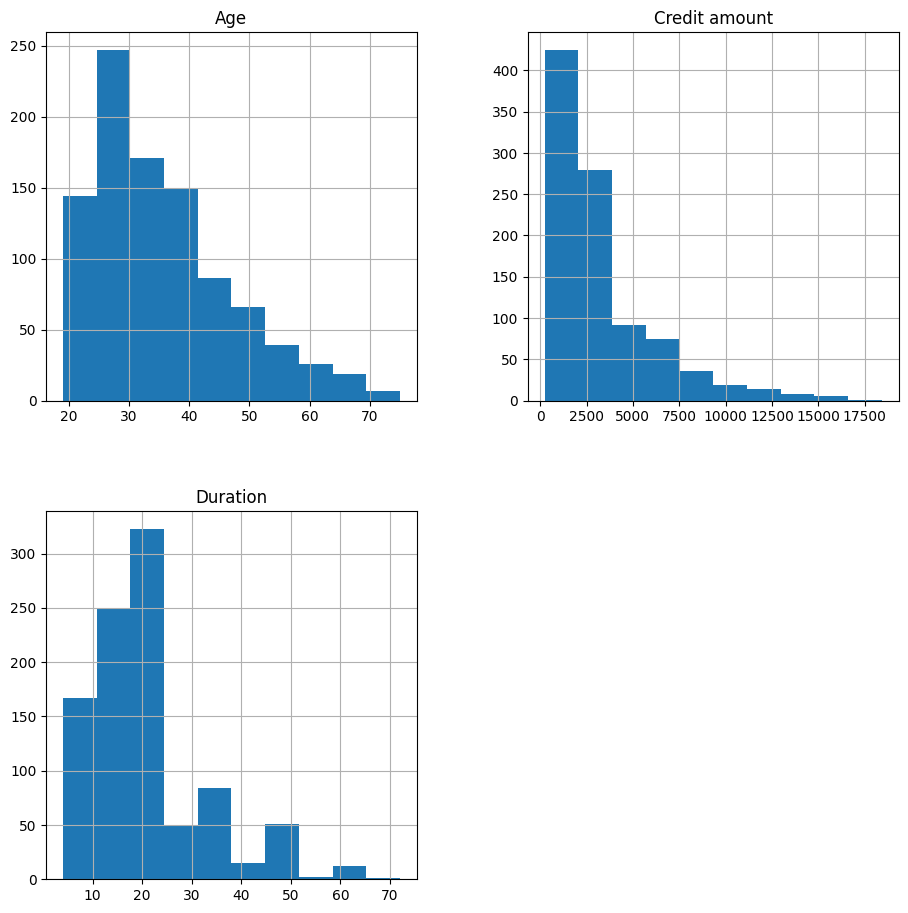

<Figure size 640x480 with 0 Axes>

In [14]:
#Histogram Visualization
df.hist(figsize = (11,11))
plt.figure()

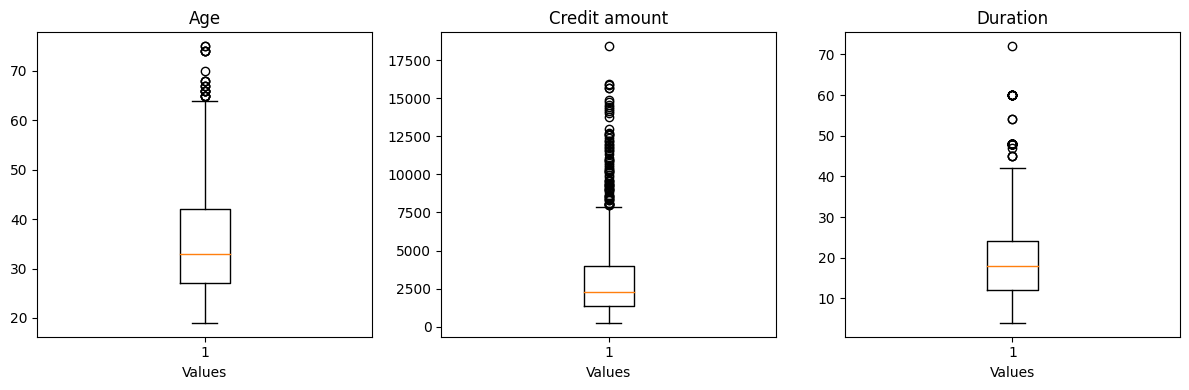

In [15]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(12, 4))

# Create box plots for each numeric column
for i, col in enumerate(numeric_columns):
    ax = axes[i]
    ax.boxplot(df[col])
    ax.set_title(col)
    ax.set_xlabel('Values')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [16]:

# Remove outliers based on quantiles
for col in numeric_columns:
    upper_bound = df[col].quantile(0.90)
    df = df[(df[col] <= upper_bound)]

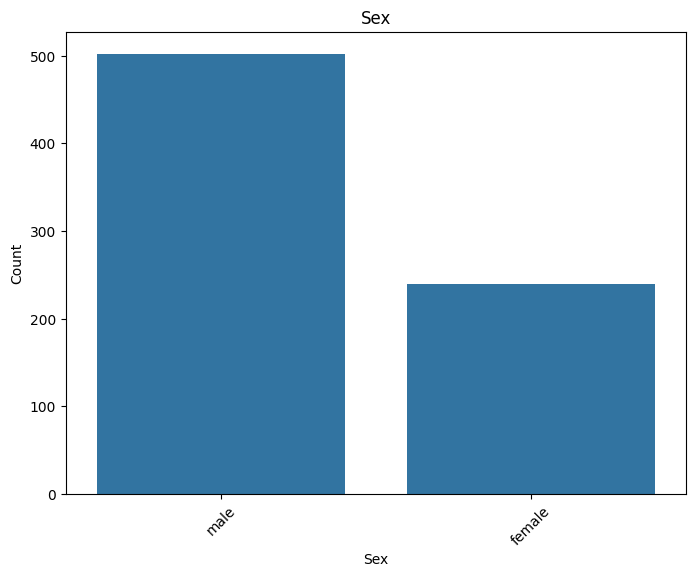

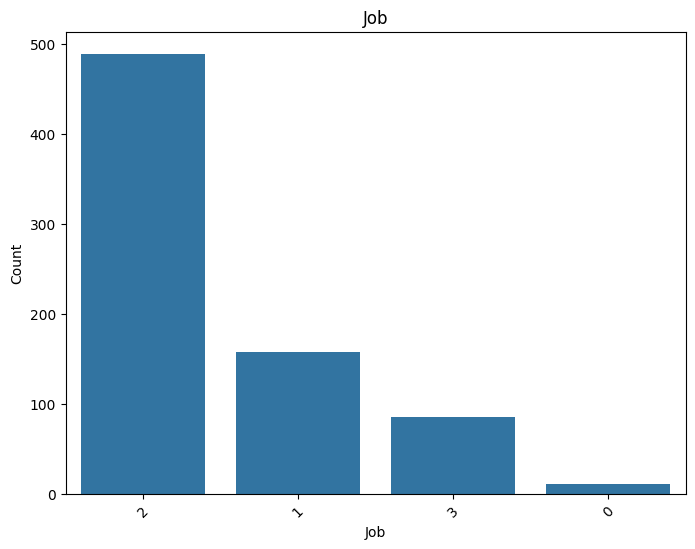

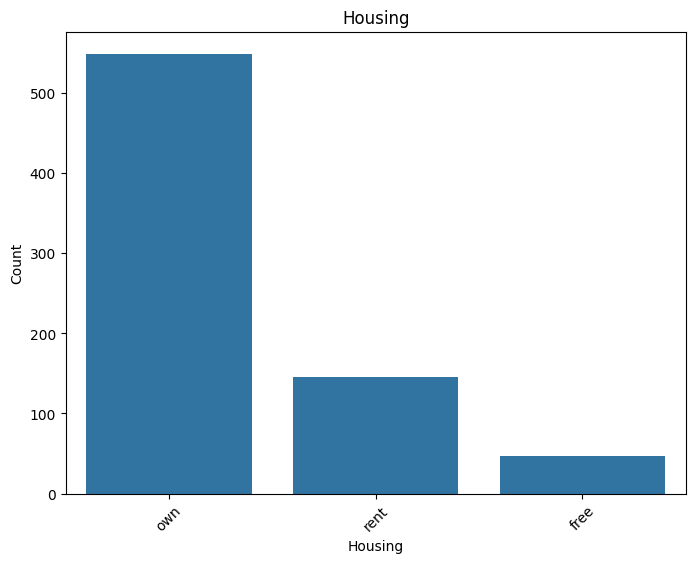

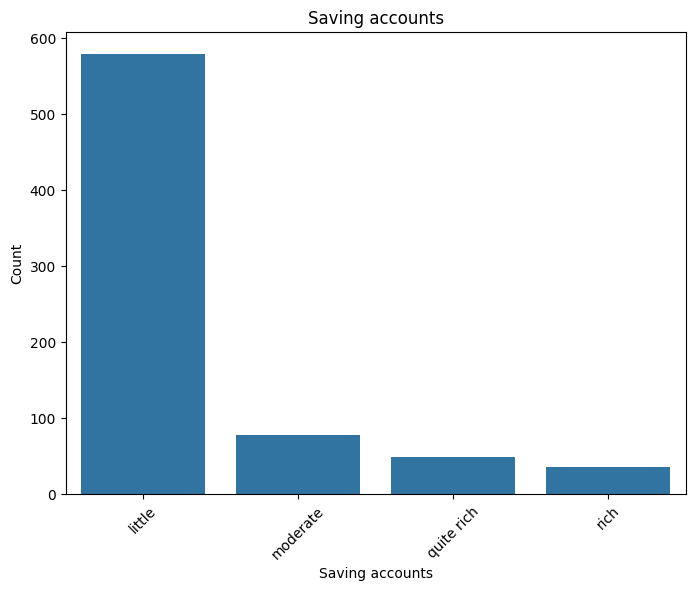

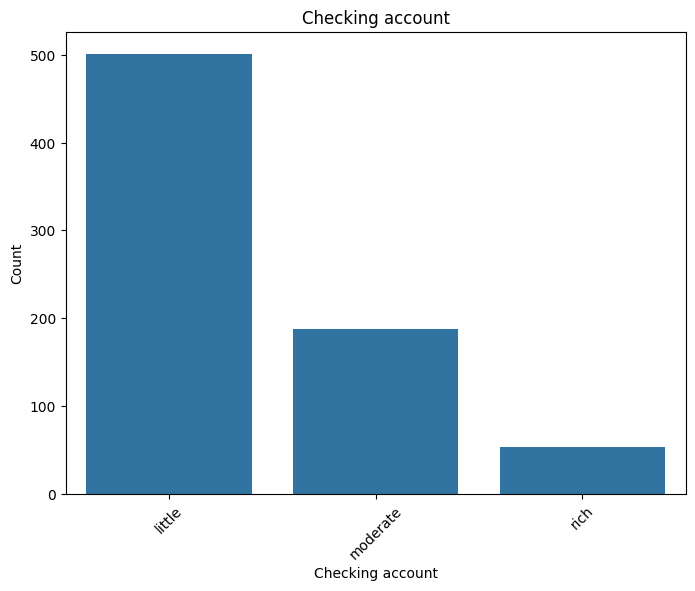

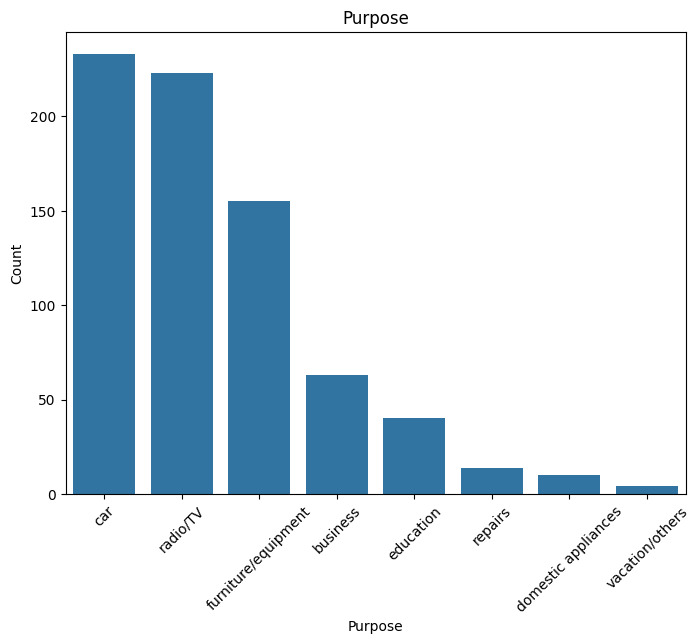

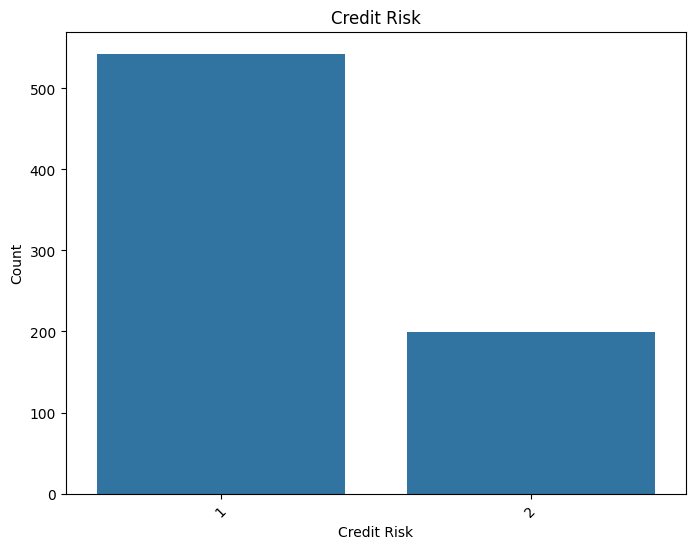

In [17]:
#Univariate analysis 
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

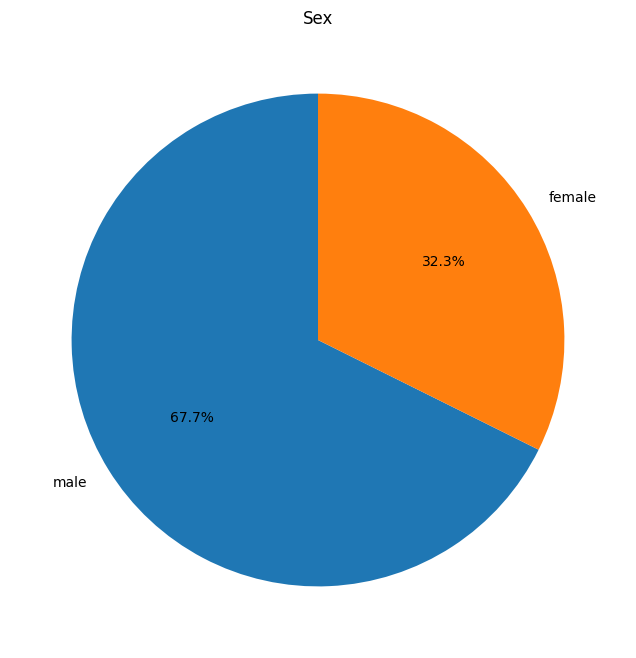

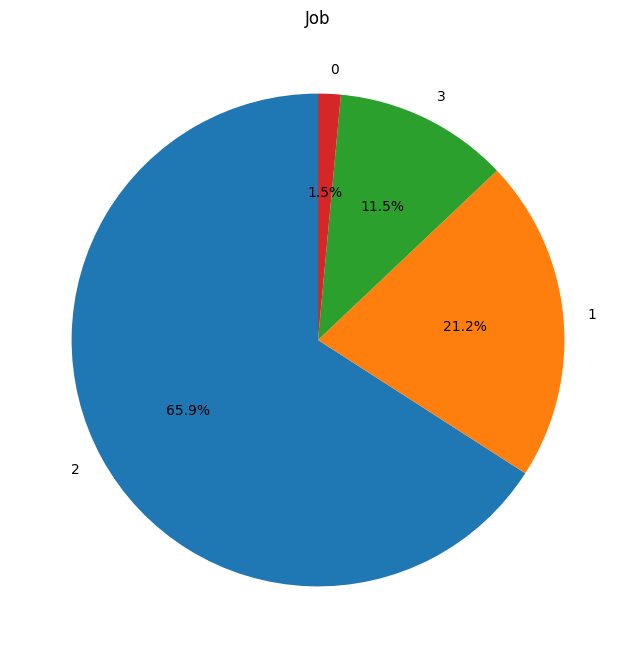

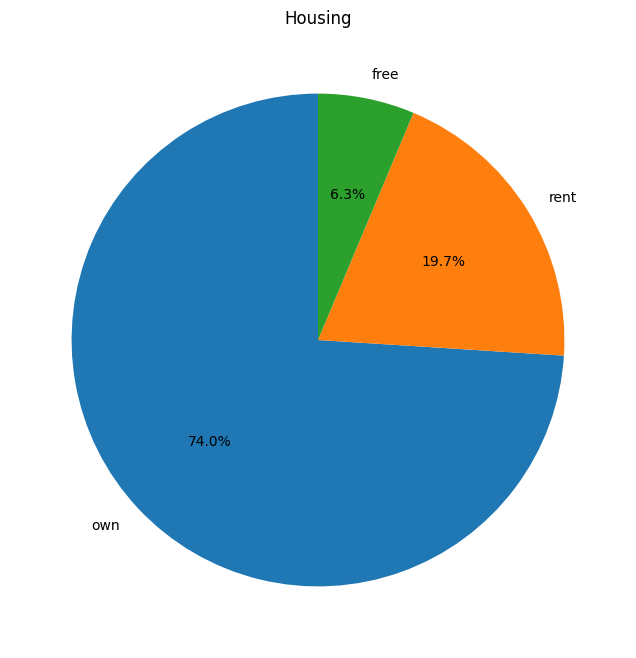

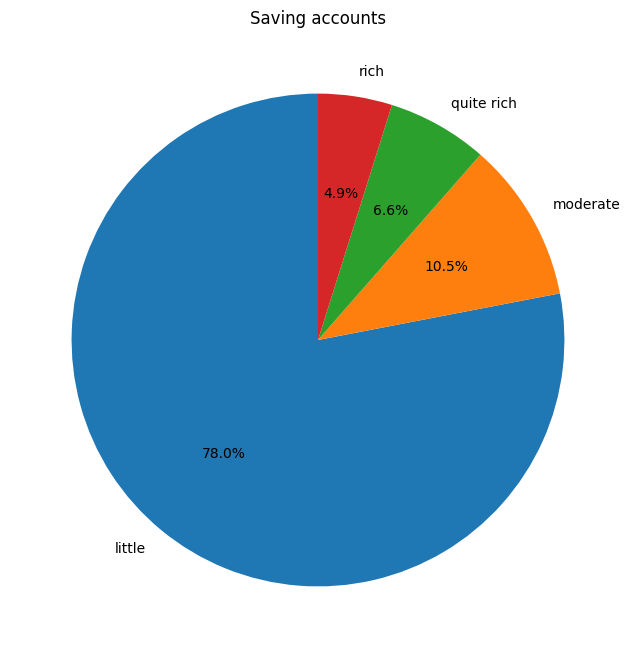

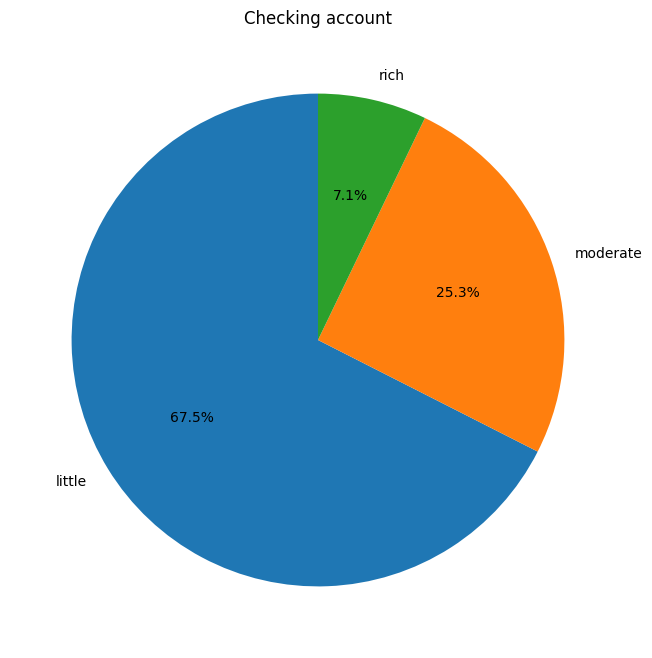

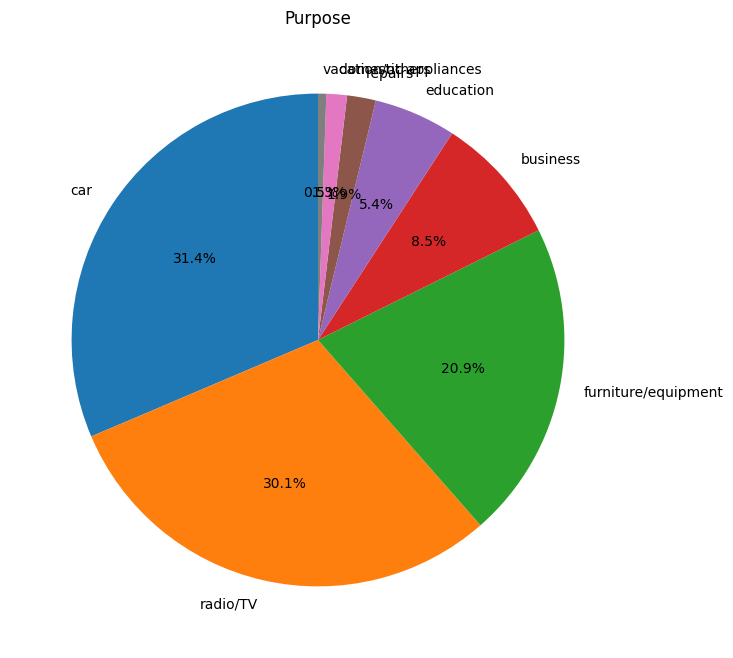

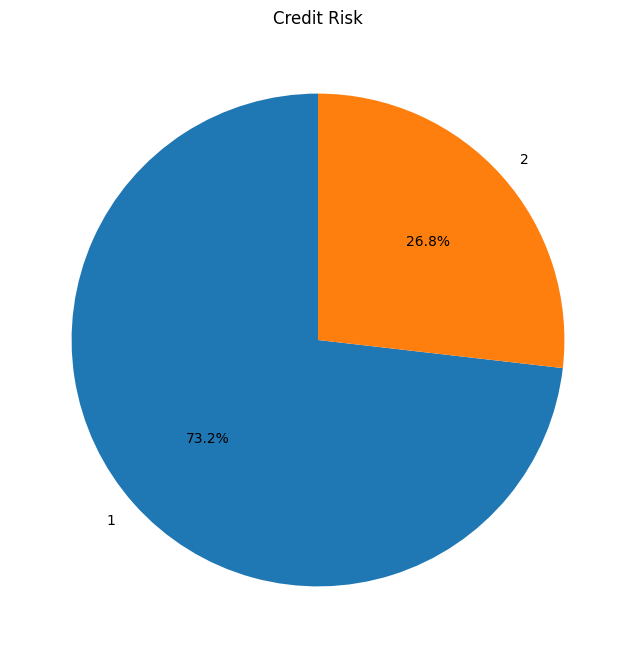

In [18]:
for col in cat_cols:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'{col}')
    plt.ylabel('')
    plt.show()


Chi-Square Test for Sex vs. Credit Risk
Chi-Square Statistic: 10.318188191458052
P-value: 0.0013172554163469897
Expected Frequencies Table:
 [[175.63342318  64.36657682]
 [367.36657682 134.63342318]]


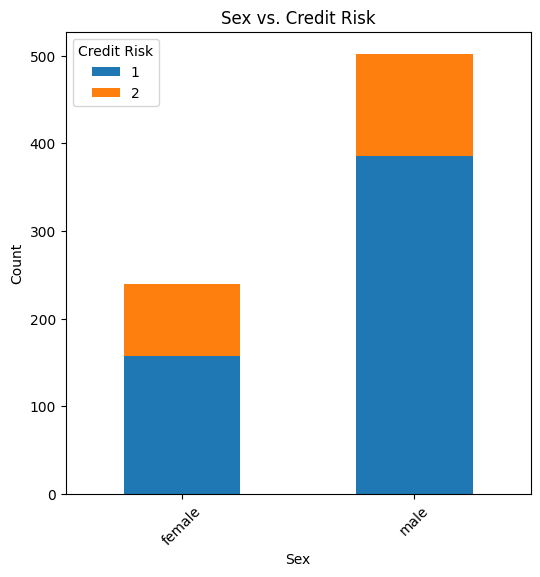



Chi-Square Test for Job vs. Credit Risk
Chi-Square Statistic: 0.712951736330257
P-value: 0.8701534244701199
Expected Frequencies Table:
 [[  8.04986523   2.95013477]
 [114.893531    42.106469  ]
 [357.85309973 131.14690027]
 [ 62.20350404  22.79649596]]


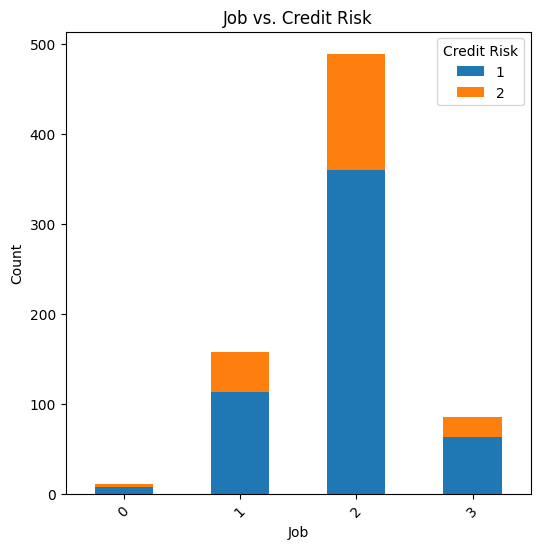



Chi-Square Test for Housing vs. Credit Risk
Chi-Square Statistic: 7.8492525881732025
P-value: 0.01974951600351154
Expected Frequencies Table:
 [[ 34.39487871  12.60512129]
 [401.76145553 147.23854447]
 [106.84366577  39.15633423]]


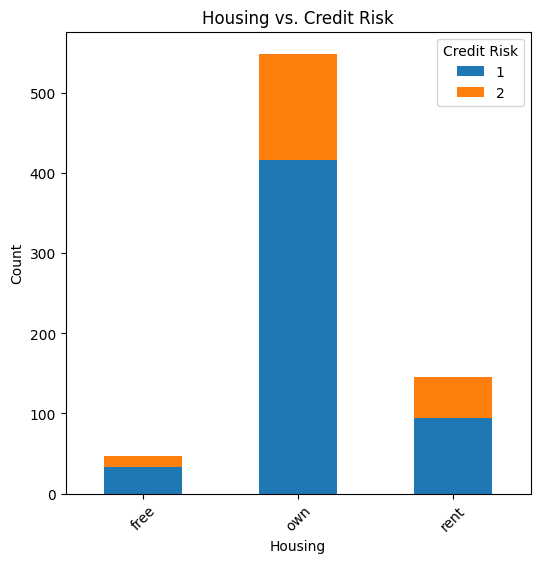



Chi-Square Test for Saving accounts vs. Credit Risk
Chi-Square Statistic: 13.714719874664821
P-value: 0.0033203432912061372
Expected Frequencies Table:
 [[423.71563342 155.28436658]
 [ 57.08086253  20.91913747]
 [ 35.85849057  13.14150943]
 [ 26.34501348   9.65498652]]


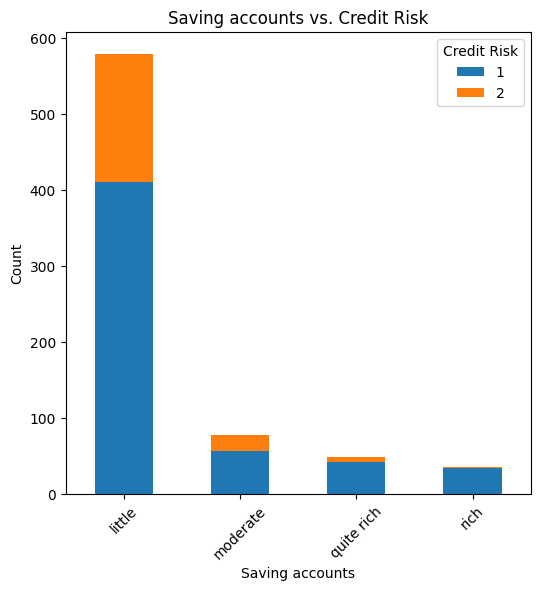



Chi-Square Test for Checking account vs. Credit Risk
Chi-Square Statistic: 4.868324210318418
P-value: 0.08767117550674149
Expected Frequencies Table:
 [[366.63477089 134.36522911]
 [137.57951482  50.42048518]
 [ 38.78571429  14.21428571]]


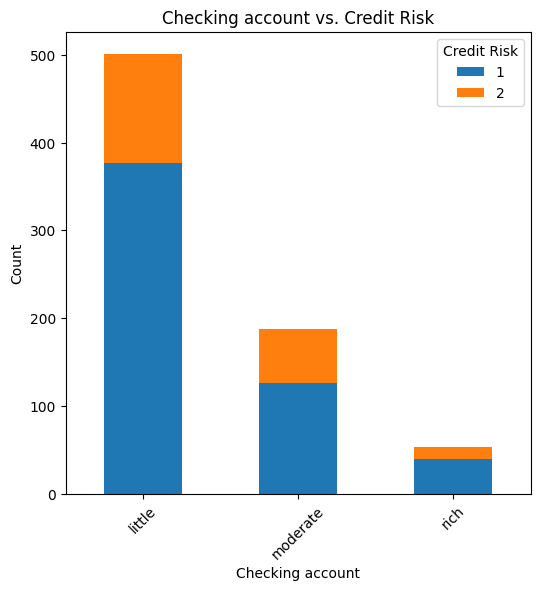



Chi-Square Test for Purpose vs. Credit Risk
Chi-Square Statistic: 13.501942274066613
P-value: 0.06078290513565752
Expected Frequencies Table:
 [[ 46.10377358  16.89622642]
 [170.51078167  62.48921833]
 [  7.3180593    2.6819407 ]
 [ 29.2722372   10.7277628 ]
 [113.42991914  41.57008086]
 [163.19272237  59.80727763]
 [ 10.24528302   3.75471698]
 [  2.92722372   1.07277628]]


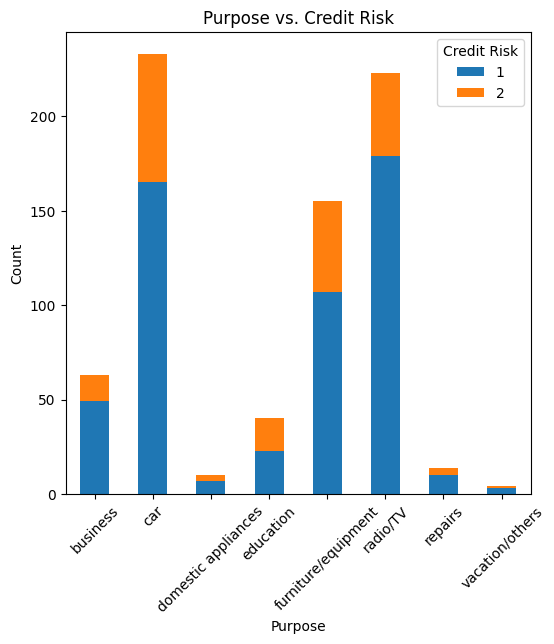



Chi-Square Test for Credit Risk vs. Credit Risk
Chi-Square Statistic: 736.9136210131801
P-value: 2.811154988744146e-162
Expected Frequencies Table:
 [[397.37061995 145.62938005]
 [145.62938005  53.37061995]]


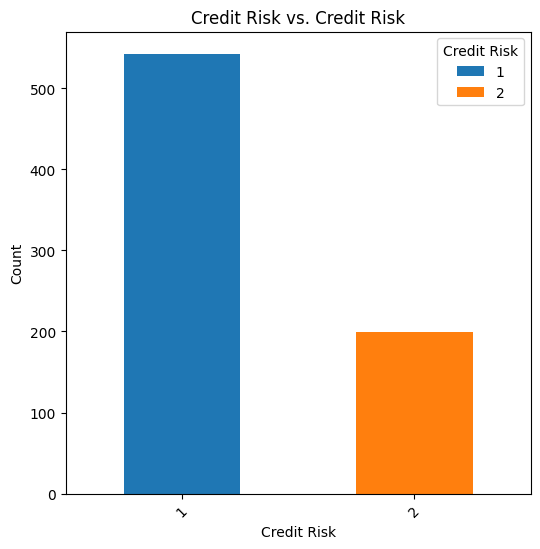

In [19]:
#Chi square test for statistical analysis of categorical variables
from scipy.stats import chi2_contingency
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Credit Risk'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-Square Test for {col} vs. Credit Risk")
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)
    print("Expected Frequencies Table:\n", expected)
    
    ax = contingency_table.plot(kind='bar', stacked=True, figsize=(6, 6))
    plt.title(f'{col} vs. Credit Risk')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Credit Risk')
    plt.show()
    print("\n")

Correlation Matrix:
                    Age  Credit amount  Duration
Age            1.000000       0.019599 -0.069291
Credit amount  0.019599       1.000000  0.491568
Duration      -0.069291       0.491568  1.000000


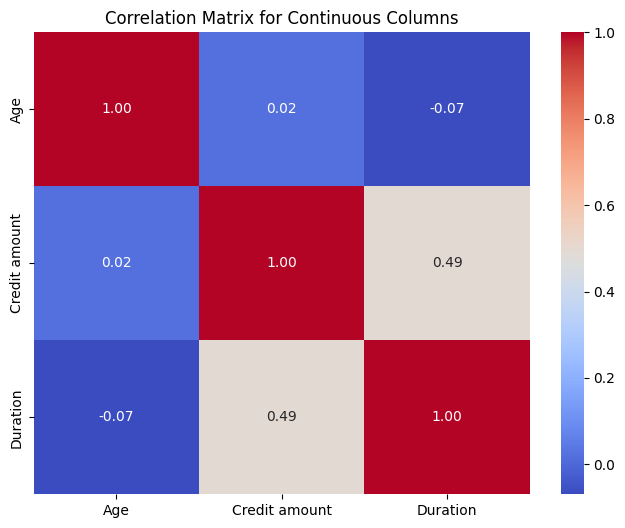

In [20]:
#Checking correlation of continuous variables
correlation_matrix = df[numeric_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Continuous Columns')
plt.show()

T-test for Age: t-statistic = 3.740001375275132, p-value = 0.00019823820498611667
T-test for Credit amount: t-statistic = 1.2372038199503557, p-value = 0.21640387585829562
T-test for Duration: t-statistic = -3.4953559278579847, p-value = 0.0005016345001138332


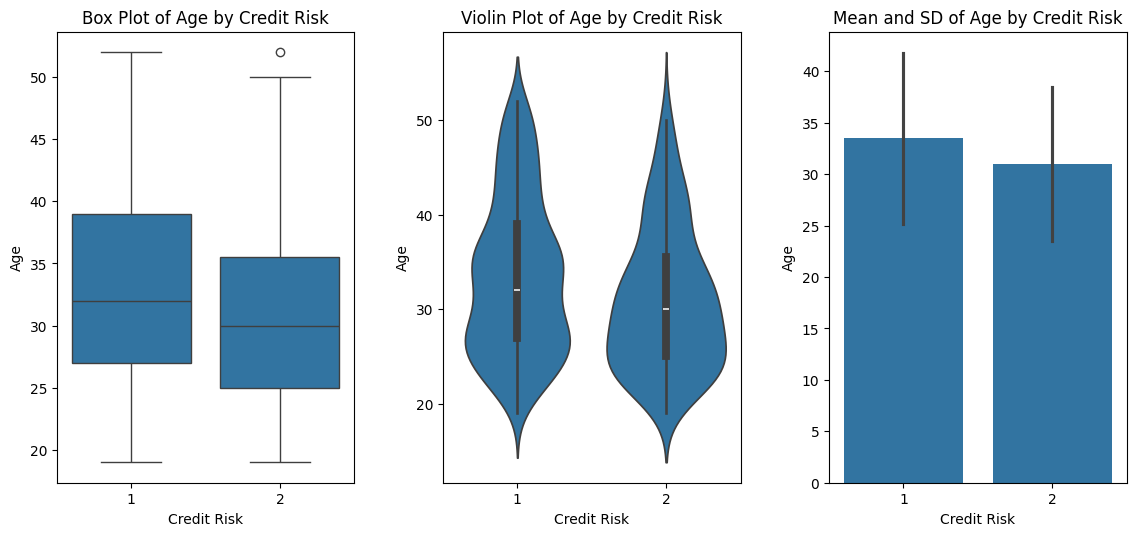

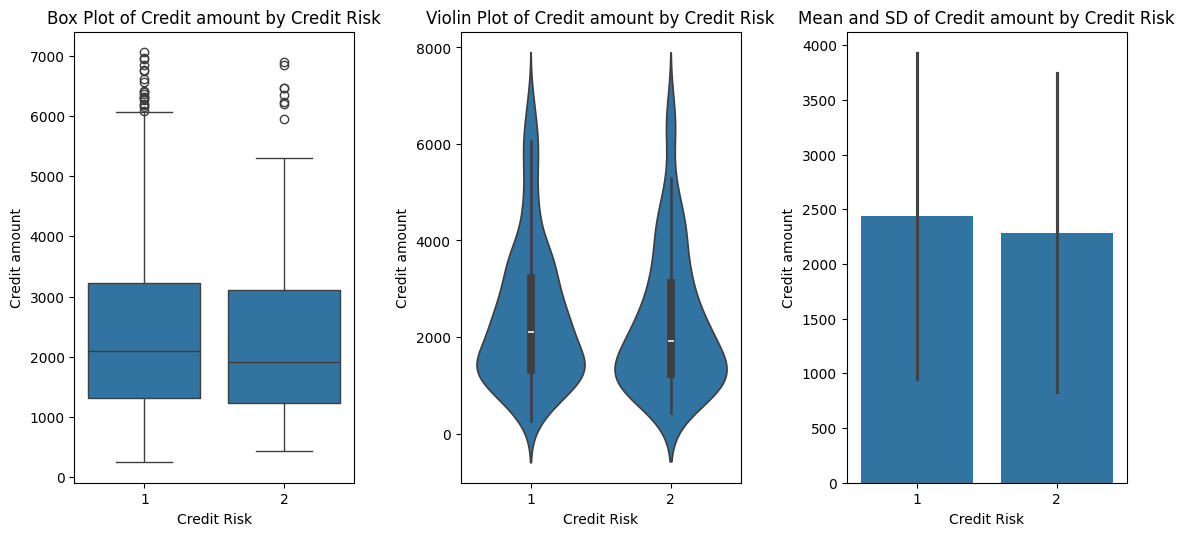

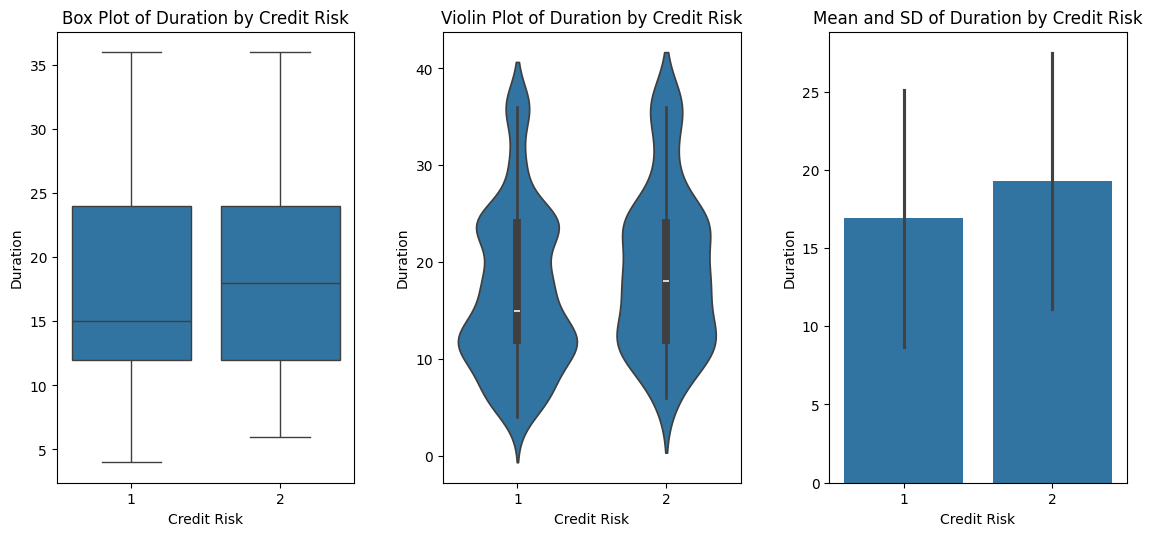

In [21]:
#Conduct T-test since the dependent variable has 2 categories (1,2)
from scipy.stats import ttest_ind, f_oneway

for col in numeric_columns:
    group1 = df[df['Credit Risk'] == 1][col]
    group2 = df[df['Credit Risk'] == 2][col]
    
    t_stat, p_val = ttest_ind(group1, group2)
    print(f'T-test for {col}: t-statistic = {t_stat}, p-value = {p_val}')
    

# Visualizations
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Box Plot
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Credit Risk', y=col, data=df)
    plt.title(f'Box Plot of {col} by Credit Risk')
    
    # Violin Plot
    plt.subplot(1, 3, 2)
    sns.violinplot(x='Credit Risk', y=col, data=df)
    plt.title(f'Violin Plot of {col} by Credit Risk')
    
    # Bar Plot with Error Bars
    plt.subplot(1, 3, 3)
    sns.barplot(x='Credit Risk', y=col, data=df, ci='sd')
    plt.title(f'Mean and SD of {col} by Credit Risk')
    
    plt.tight_layout(pad=3.0)
    plt.show()

In [22]:
X = df.drop('Credit Risk', axis=1)
y = df['Credit Risk']

In [23]:
cat_cols = df.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols)

In [24]:
X

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
2,49,2096,12,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,35,6948,36,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
9,28,5234,30,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
10,25,1295,12,True,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
12,22,1567,12,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,43,1533,18,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
949,31,3621,24,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
950,40,3590,18,False,True,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
951,24,2145,36,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X[numeric_columns] = sc.fit_transform(X[numeric_columns])
X

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
2,1.989187,-0.204435,-0.670524,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,0.271365,3.075962,2.235460,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
9,-0.587545,1.917141,1.508964,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
10,-0.955650,-0.745984,-0.670524,True,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
12,-1.323754,-0.562087,-0.670524,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1.252978,-0.585074,0.055972,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
949,-0.219441,0.826605,0.782468,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
950,0.884873,0.805646,0.055972,False,True,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
951,-1.078351,-0.171306,2.235460,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [26]:
#Using SMOTE as target is imbalanced
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [27]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [28]:
folds = 10
instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [29]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))

In [30]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=folds)
    cv_results = cross_val_score(model, X_train_balanced, y_train_balanced, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.746957 (0.089354)
DT: 0.724125 (0.086264)
NB: 0.631243 (0.064262)
SVM: 0.771996 (0.064688)
AB: 0.711599 (0.087078)
RF: 0.837200 (0.088303)


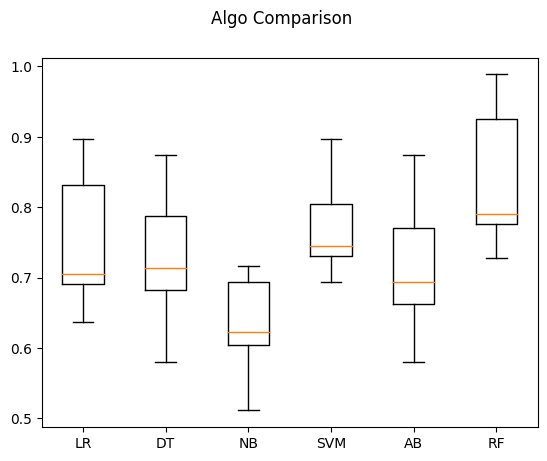

In [31]:
fig = plt.figure()
fig.suptitle('Algo Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],             
    'bootstrap': [True, False],
    'max_features' : ['auto',2,4,6,8,10]
}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [33]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 2, 'n_estimators': 300}


In [34]:
# Get the best estimator
best_rf_clf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
print("Classification Report (RF):")
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.7181208053691275
Classification Report (RF):
              precision    recall  f1-score   support

           1       0.74      0.91      0.82       105
           2       0.55      0.25      0.34        44

    accuracy                           0.72       149
   macro avg       0.65      0.58      0.58       149
weighted avg       0.69      0.72      0.68       149



In [35]:
feature_importances = best_rf_clf.feature_importances_

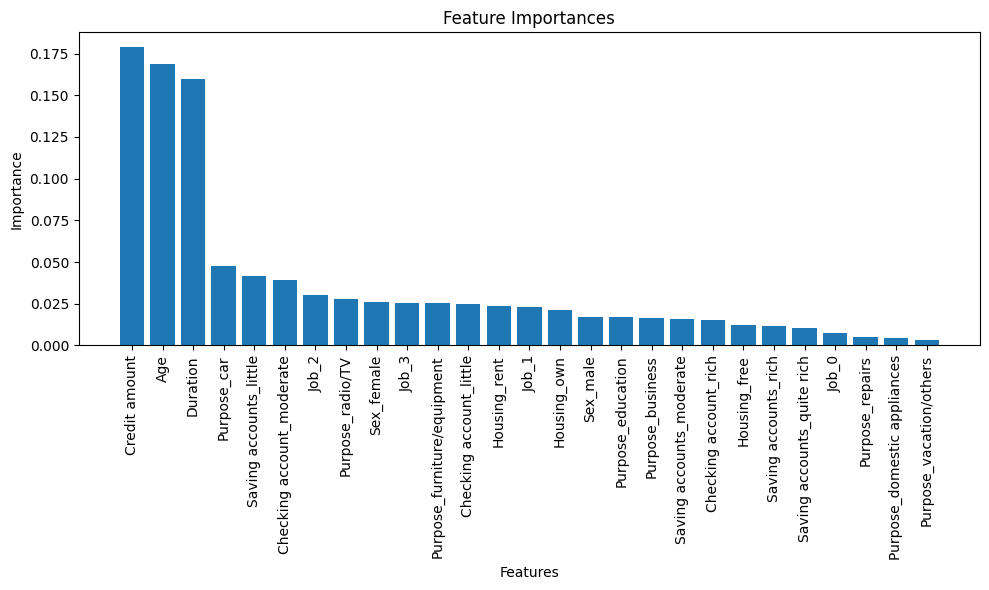

In [36]:
feature_names = X_train_balanced.columns  # Replace with your actual feature names

# Create a dictionary mapping feature names to importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance (descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), [importance for _, importance in sorted_features], align='center')
plt.xticks(range(len(sorted_features)), [feature for feature, _ in sorted_features], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [37]:
#Checking for SVM with 15 features as it showed comparable results during CV

top_features = [feature for feature, _ in sorted_features[:15]]

X_train_top = X_train_balanced[top_features]
X_test_top = X_test[top_features]

svm_model = SVC(kernel = 'rbf')
svm_model.fit(X_train_top, y_train_balanced)
preds = svm_model.predict(X_test_top)

accuracy = svm_model.score(X_test_top, y_test)
print("SVM Accuracy:", accuracy)

print("\nClassification Report (SVM):")
print(classification_report(y_test, preds))

SVM Accuracy: 0.6644295302013423

Classification Report (SVM):
              precision    recall  f1-score   support

           1       0.74      0.80      0.77       105
           2       0.42      0.34      0.37        44

    accuracy                           0.66       149
   macro avg       0.58      0.57      0.57       149
weighted avg       0.65      0.66      0.65       149

